# 11강. 사이킷런으로 구현해 보는 머신러닝
## 11-6. 사이킷런의 주요 모듈 (2) 회귀 모델 실습
- 예제 데이터와 머신러닝의 회귀 모델을 이용해 데이터를 예측하는 모델을 만들어 본다. 예제 데이터는 yn이라는 라벨 값을 각각 가지는 입력 데이터 xn 100개로 구성되어 있다.

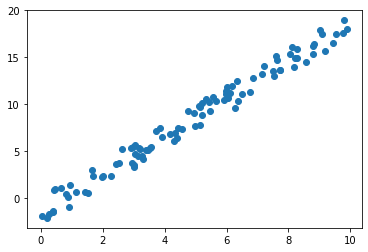

In [1]:
import numpy as np
import matplotlib.pyplot as plt
r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x - 3 * r.rand(100)
plt.scatter(x,y)

In [2]:
# 입력 데이터 x의 모양 확인
x.shape

(100,)

In [3]:
# 정답 데이터 y의 모양 확인
y.shape

(100,)

- x와 y의 모양은 (100,)으로 1차원 벡터이다.

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

- 사이킷런에서 머신러닝 모델을 사용하기 위해서 우선 모델 객체를 생성해 준다. 사용할 모델의 이름은 LinearRegression 이며, sklearn.linear_model 안에 있다.

In [5]:
# 훈련
model.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[7.71320643 0.20751949 6.33648235 7.48803883 4.98507012 2.24796646
 1.98062865 7.60530712 1.69110837 0.88339814 6.85359818 9.53393346
 0.03948266 5.12192263 8.12620962 6.12526067 7.21755317 2.91876068
 9.17774123 7.14575783 5.42544368 1.42170048 3.7334076  6.74133615
 4.41833174 4.34013993 6.17766978 5.13138243 6.50397182 6.01038953
 8.05223197 5.21647152 9.08648881 3.19236089 0.90459349 3.00700057
 1.13984362 8.28681326 0.46896319 6.26287148 5.47586156 8.19286996
 1.9894754  8.56850302 3.51652639 7.54647692 2.95961707 8.8393648
 3.25511638 1.65015898 3.92529244 0.93460375 8.21105658 1.5115202
 3.84114449 9.44260712 9.87625475 4.56304547 8.26122844 2.51374134
 5.97371648 9.0283176  5.34557949 5.90201363 0.39281767 3.57181759
 0.7961309  3.05459918 3.30719312 7.73830296 0.39959209 4.29492178
 3.14926872 6.36491143 3.4634715  0.43097356 8.79915175 7.63240587
 8.78096643 4.17509144 6.05577564 5.13466627 5.97836648 2.62215661
 3.00871309 0.25399782 3.03062561 2.42075875 5.57578189 5.6550702
 4.75132247 2.92797976 0.64251061 9.78819146 3.39707844 4.95048631
 9.77080726 4.40773825 3.18272805 5.19796986].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

- 이 모델을 훈련시킨다. -> fit() : 훈련시키는 메서드
- fit()메서드에 인자로 특성 행렬과 타겟 벡터를 넣어 준다. 즉, 행렬 형태의 입력 데이터와 1차원 벡터 형태의 정답(라벨)을 각각 넣어 준다.
- 위의 입력 데이터인 x를 그대로 넣으면, 에러가 발생한다. x를 행렬로 바꾸어 주어야 한다.

In [6]:
X = x.reshape(100,1)

- x는 numpy의 ndarray타입이므로 reshape()를 사용한다. 통상 특성 행렬의 변수명은 X로 하고, 변수명 X에 특성 행렬을 넣는다.

In [7]:
# 훈련
model.fit(X,y)

LinearRegression()

In [8]:
x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100,1)
y_new = model.predict(X_new)

- 새로운 데이터를 넣고 예측을 하려고 한다. 새로운 데이터는 np.linspace()를 이용해서 생성한다. 예측은 predict()를 사용하는데, predict()의 인자 역시 행렬로 넣어 주어야 한다.

In [9]:
X_ = x_new.reshape(2,-1)
X_.shape

(2, 50)

- Tip! reshape() 함수에서 나머지 숫자를 -1로 넣으면 자동으로 남은 숫자를 계산해 준다. 즉, x_new의 인자의 개수가 100개이므로, (100, 1)의 형태나 (2, 50)의 형태 등으로 변환해 줄 수 있는데, (2, -1)을 인자로 넣으면 (2, 50)의 형태로 자동으로 변환해 준다.

In [10]:
from sklearn.metrics import mean_squared_error

error =np.sqrt(mean_squared_error(y,y_new))

print(error)

9.299028215052264


- 학습된 회귀 모델이 잘 예측했는지 모델의 성능을 평가한다. 모델의 성능 평가 관련 모듈은 sklearn.metrics에 저장되어 있다. 회귀 모델의 경우 RMSE(Root Mean Square Error) 를 사용해 성능을 평가한다.
- 사이킷런의 RMSE 오차 관련 함수 : [Scikit-learn: Mean Squared Error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error) -> mean_squared_error 함수의 np.sqrt 활용

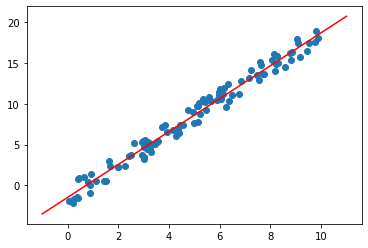

In [11]:
# 그래프 그리기
plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')

- 그래프의 점들과 회귀선이 거의 일치한다.

## 11-7. 사이킷런의 주요 모듈 (3) datasets 모듈
- 사이킷런은 데이터셋을 모듈로 제공하고 있다.
 - 데이터 관련 내용 : [Scikit-learn: Dataset loading utilities](https://scikit-learn.org/stable/datasets)
- sklearn.datasets 모듈은 크게 dataset loaders와 dataset fetchers로 나뉘며, 각각 Toy dataset과 Real World dataset을 제공하고 있다. 그 중 Toy dataset를 다룰 것인데, Toy dataset의 예시는 다음과 같다.
 - datasets.load_boston(): 회귀 문제, 미국 보스턴 집값 예측(version 1.2 이후 삭제 예정)
 - datasets.load_breast_cancer(): 분류 문제, 유방암 판별
 - datasets.load_digits(): 분류 문제, 0 ~ 9 숫자 분류
 - datasets.load_iris(): 분류 문제, iris 품종 분류
 - datasets.load_wine(): 분류 문제, 와인 분류

### datasets.load_wine() 뜯어보기

In [12]:
from sklearn.datasets import load_wine
data = load_wine()
type(data)

sklearn.utils.Bunch

- 와인 분류 데이터를 다운로드한 다음 data란 변수에 할당한다.
- 자료형을 확인하면 sklearn.utils.Bunch이다. -> Bunch는 파이썬의 딕셔너리와 유사한 형태의 데이터 타입이다.
 - [Scikit-learn: sklearn.utils.Bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html?highlight=bunch#sklearn.utils.Bunch)

In [13]:
print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

- data를 출력해 보면 데이터들이 중괄호에 {} 담겨있고 콜론 : 을 이용해서 구분되어 있다. key와 value로 구분되는 것이다. 번치 데이터 타입에도 파이썬의 딕셔너리 메서드인 keys()를 사용할 수 있다.

In [14]:
# key 확인
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

#### 1. data
- 키값 data는 특성 행렬이다. 파이썬의 딕셔너리와 유사하기 때문에 키에 접근하기 위해서 .을 사용할 수 있다.

In [15]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [16]:
data.data.shape

(178, 13)

- 특성 행렬은 2차원이며 행에는 데이터의 개수(n_samples)가 열에는 특성의 개수(n_features)가 들어 있다. 모양을 확인해보면 (178, 13)이 나온다. 즉, 특성이 13개, 데이터가 178개인 특성 행렬이 나온다.

In [17]:
# 차원 확인 -> ndim
data.data.ndim

2

#### 2. target

In [18]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

- 키값 target은 타겟 벡터이다.

In [19]:
data.target.shape

(178,)

- 타겟 벡터는 1차원이다. 그리고 타겟 벡터의 길이는 특성 행렬의 데이터 개수와 일치해야 한다.

#### 3. feature_names

In [20]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

- data 키에 접근해서 data의 값을 확인해 본 결과 특성이 13개임을 확인했다. 이 특성들의 이름은 feature_names 키를 통해 알 수 있다.

In [21]:
# feature 개수 확인
len(data.feature_names)

13

- feature_names의 개수와 특성 행렬의 n_features(열)의 숫자가 일치한다.

#### 4. target_names

In [23]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

- target_names는 분류하고자 하는 대상이다.
- 출력값을 확인해보면 데이터를 각각 class_0과 class_1, class_2로 분류한다는 것을 알 수 있다. 와인의 종류가 상세하게 무엇을 의미하는지는 모르지만 각각 0번 와인, 1번 와인, 2번 와인으로 분류를 하는 문제임을 알 수 있다.

#### 5. DESCR

In [24]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

- DESCR은 describe의 약자로 데이터에 대한 설명을 나타낸다.

위의 내용은 사이킷런 공식 문서에도 나와 있다. 
- [sklearn.datasets.load_wine()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html?highlight=wine#sklearn.datasets.load_wine)

## 11-8. 사이킷런의 주요 모듈 (4) 사이킷런 데이터셋을 이용한 분류 문제 실습
### DataFrame으로 나타내기
- 특성 행렬은 Pandas의 DataFrame으로 나타낼 수 있다.

In [25]:
import pandas as pd

pd.DataFrame(data.data, columns=data.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


### 머신러닝

In [26]:
X = data.data
y = data.target

- 머신러닝 모델을 만들고 예측을 하기 위해 특성 행렬은 통상 변수명 X에 저장하고, 타겟 벡터는 y에 저장한다.

In [27]:
# 모델 생성
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

- 모델을 생성하는데, 분류 문제이므로 RandomForestClassifier를 사용한다.

In [28]:
# 훈련
model.fit(X, y)

RandomForestClassifier()

In [29]:
# 예측
y_pred = model.predict(X)

In [30]:
# 성능 평가
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#타겟 벡터 즉 라벨인 변수명 y와 예측값 y_pred을 각각 인자로 넣는다. 
print(classification_report(y, y_pred))
#정확도 출력
print("accuracy = ", accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

accuracy =  1.0


- 성능을 평가하기 위해 sklearn.metrics 모듈을 사용한다. 분류 문제의 경우 classification_report 와 accuracy_score를 이용한다.
- accuracy가 1.0이 나온 이유는 동일한 데이터로 훈련과 예측을 하였기 때문이다.

## 11-9. 사이킷런의 주요 모듈 (5) Estimator
- 모델 훈련에서 핵심이 되는 API를 살펴본다.

### Estimator 객체
- 데이터셋을 기반으로 머신러닝 모델의 파라미터를 추정하는 객체를 Estimator라고 한다. 사이킷런의 모든 머신러닝 모델은 Estimator라는 파이썬 클래스로 구현되어 있다. 추정을 하는 과정 즉, 훈련은 Estimator의 fit()메서드를 통해 이루어지고, 예측은 predict()메서드를 통해 이루어진다. 앞에서 사용한 Estimator 객체는 LinearRegression()과 RandomForestClassifier()이다.
- 와인 분류 문제를 해결하는 과정을 그림으로 표현하면 다음과 같다.
![와인분류문제](https://user-images.githubusercontent.com/116326867/226159355-84600efb-438f-4444-a75d-cbc54913c05b.png)
- 선형 회귀 문제를 해결하는 과정을 그림으로 표현하면 다음과 같다.
![선형회귀문제](https://user-images.githubusercontent.com/116326867/226159359-cd58ed06-7c3c-4baa-ad4e-b3fc4141e64b.png)
- 타겟 벡터가 없는(정답이 없는) 데이터인 비지도학습의 경우는 fit() 메서드의 인자로 Target Vector가 들어가지 않는다.
![비지도학습](https://user-images.githubusercontent.com/116326867/226159361-975366d3-01aa-408d-ab8d-21eff8a51882.png)
- 사이킷런의 Estimator 객체를 사용한다면 비지도학습, 지도학습에 관계없이 학습과 예측을 할 수 있다.

## 11-10. 훈련 데이터와 테스트 데이터 분리하기
- 훈련에 사용되는 데이터(특성 행렬)와 예측에 사용되는 데이터(특성 행렬)에 같은 값을 넣으면 즉, 동일한 데이터로 훈련과 예측을 하면 정확도가 100% 로 나온다. 이를 방지하기 위해 오른쪽의 그림과 같이 훈련에 쓰이는 데이터와 예측에 쓰이는 데이터는 다른 데이터를 사용해야 한다.
![데이터](https://user-images.githubusercontent.com/116326867/226160022-bbb43f39-bdf6-4e85-8756-b035afaac351.jpeg)


### 훈련 데이터와 테스트 데이터 직접 분리하기
- 보통 훈련 데이터와 테스트 데이터의 비율은 8:2로 설정한다.

In [31]:
from sklearn.datasets import load_wine
data = load_wine()
print(data.data.shape)
print(data.target.shape)

(178, 13)
(178,)


In [32]:
X_train = data.data[:142]
X_test = data.data[142:]
print(X_train.shape, X_test.shape)

(142, 13) (36, 13)


In [33]:
y_train = data.target[:142]
y_test = data.target[142:]
print(y_train.shape, y_test.shape)

(142,) (36,)


- 전체 데이터의 개수는 178개이다. 8 대 2로 특성 행렬과 타겟 벡터를 나누어 보도록 한다. 데이터의 개수이므로 정수만 가능하므로 178개의 80%면 142.4이지만 정수로 표현해 142개, 그리고 훈련 데이터는 나머지 36개로 나눈다. 특성 행렬과 타겟 벡터는 ndarray type이므로 numpy의 슬라이싱을 사용한다.
![분리](https://user-images.githubusercontent.com/116326867/226160152-6b85177b-6f83-4be4-bf0f-cd9c35e6365f.png)

In [34]:
# 훈련
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
# 예측
y_pred = model.predict(X_test)

In [36]:
# 정확도 평가
from sklearn.metrics import accuracy_score

print("정답률=", accuracy_score(y_test, y_pred))

정답률= 0.9722222222222222


### train_test_split() 사용해서 분리하기
- 훈련 데이터와 테스트 데이터 분리하는 기능을 사이킷런에서는 API로 제공하고 있다. model_selection의 train_test_split() 함수를 사용하면 된다.

In [37]:
from sklearn.model_selection import train_test_split

result = train_test_split(X, y, test_size=0.2, random_state=42)

- 인자로 특성 행렬 X와 타겟 벡터 y를 넣고 테스트 데이터의 비율을 넣어 키워드 인자로 지정해 준다. 20%로 지정한다. 그리고 0번부터 순차적으로 데이터를 분할해도 되지만 사이킷런은 랜덤하게 데이터를 섞어주는 기능도 있다. random_state 인자에 seed 번호를 입력하면 된다. seed 번호는 임의로 결정할 수 있고, 같은 seed 번호를 사용하면 언제든 같은 결과를 얻을 수 있다.

In [38]:
print(type(result))
print(len(result))

<class 'list'>
4


- train_test_split()은 반환값으로 4개의 원소로 이루어진 list를 반환한다. (+ 리스트 원소의 데이터 타입은 array)

In [39]:
# 각각의 모양 확인
result[0].shape

(142, 13)

In [40]:
result[1].shape

(36, 13)

In [41]:
result[2].shape

(142,)

In [42]:
result[3].shape

(36,)

- 0번 원소부터 순서대로 훈련 데이터용 특성 행렬, 테스트 데이터용 특성 행렬, 훈련 데이터용 타겟 벡터, 테스트 데이터용 타겟 벡터이다.

In [43]:
# 위의 과정 unpacking
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 실습
- 와인 분류 문제의 데이터를 훈련용 데이터셋과 테스트용 데이터셋으로 나눈 뒤 훈련하고 예측하기
 - 와인 데이터가 간단하기 때문에 training/test 데이터가 어떻게 나누어지는가에 따라서 데이터를 분리했는데도 정확도 100%가 나올 수도 있다. 
 - random seed 번호를 지정하지 않은 경우 코드를 여러 번 실행시켜 보면 정확도가 다르게 나올 것이다.

In [46]:
# 데이터셋 로드하기
data = load_wine()

# 훈련용 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# 훈련하기
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측하기
y_pred = model.predict(X_test)

# 정답률 출력하기
print("정답률=", accuracy_score(y_test, y_pred))

정답률= 1.0


## 11-11. 마무리
- 사이킷런에서 핵심이 되는 데이터의 표현법과 Estimator를 이용해 모델을 어떻게 훈련하고 예측하는지 알아보았다. 마지막으로 훈련 데이터와 테스트 데이터를 분리하는 방법에 대해서도 알아보았다. 이 외에도 평가와 관련된 항목들은 metrics 모듈에 들어가 있고, sklearn.preprocessing 모듈 역시 중요한 API 중 하나이다. 이렇듯 사이킷런은 많은 기능들이 잘 정리되어 있어 사용자에게 편의성을 제공한다.
- 사이킷런 주요 모듈
![사이킷런 주요 모듈](https://user-images.githubusercontent.com/116326867/226160579-275f5faa-6c6e-4563-9263-c353740c7025.png)